# Stochastic Gradient Descent

- separace
- snizovani
- update
- vizualizace (idealne)

# Data

In [1]:
import seaborn
import matplotlib.pylab as plt
import pandas as pd

In [6]:
labels = pd.read_csv('data/linsep-trainclass.csv', header=None)
data = pd.read_csv('data/linsep-traindata.csv', header=None)

In [7]:
df = pd.concat([data, labels], axis=1).sample(frac=1)

In [11]:
data = df.iloc[:, [0,1]]
labels = df.iloc[:, -1]
data_l = list(data.to_records(index=False))
labels_l = labels.tolist()
x1s = data.iloc[:, 0]
x2s = data.iloc[:, 1]

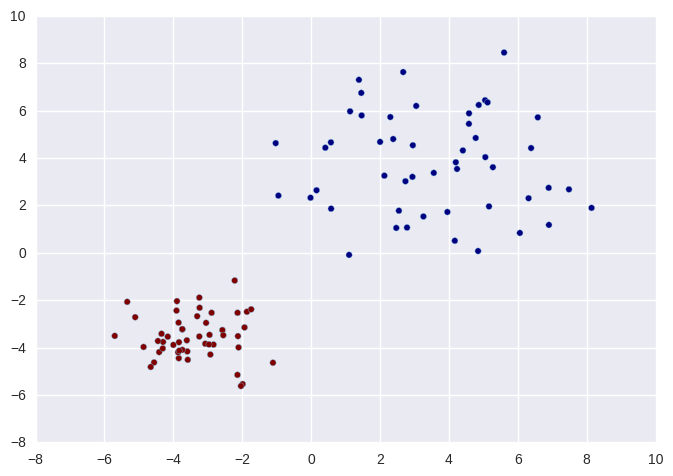

In [12]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=labels, cmap='jet')

# Code

In [47]:
import numpy as np
import matplotlib.pylab as plt

class PerceptronSGD:
    w1 = -4
    w2 = 10
    lr = 0.003
    stopping = 0.001 # ratio of correctly classified samples
    loss_history = []
    
    def predict(self, x1, x2):
        pred_val = self.w1 * x1 + self.w2 * x2  > 0
        if pred_val == True:
            return 1
        else:
            return -1
    
    def update_w(self, x1, x2, predicted, true):
        dif = -(predicted - true)
        self.w1 = self.w1 + self.lr*dif*x1
        self.w2 = self.w2 + self.lr*dif*x2
        
    def fit(self, X, Y):
        i = 0
        stp = False
        for _ in range(len(X)):
            for (x1, x2), y in zip(X,Y):
                pred = self.predict(x1, x2)
                if pred == y:
                    pass
                    #print('{}. correctly. '.format(i))
                else:
                    #print('{}. incorrectly. Updating weights...'.format(i))
                    self.update_w(x1, x2, pred, y)
                i += 1 
                cur_loss = self.loss(X, Y)
                self.loss_history.append(cur_loss)
                print('New weights: {}, {}. Loss: {}'.format(self.w1, self.w2, cur_loss))
                if cur_loss <= self.stopping:
                    stp = True
                    break
                
    
    def predict_bulk(self, xs):
        res = []
        for x1, x2 in xs:
            res.append(self.predict(x1, x2))
        return res
    
    def loss(self, X, Y):
        return (1/len(X))/sum([(pred == y) for pred, y in zip(self.predict_bulk(X), Y)])
    
    def plot_boundary(self):
        xad = np.linspace(-8, 10, 20) 
        yad = [(self.w1*x)/self.w2 for x in xad]
        plt.plot(xad, yad)
        plt.ylim(min(yad), max(yad))
        plt.scatter(data.iloc[:, 0], data.iloc[:, 1])

In [48]:
per = PerceptronSGD()
#per.plot_decision_boundary()
per.fit(data_l, labels_l)
preds = per.predict_bulk(data_l)

New weights: -3.9938266, 9.9722038. Loss: 0.0008333333333333334
New weights: -3.9876531999999996, 9.944407600000002. Loss: 0.0008333333333333334
New weights: -3.9814797999999993, 9.916611400000003. Loss: 0.0008333333333333334
New weights: -3.975306399999999, 9.888815200000003. Loss: 0.0008333333333333334
New weights: -3.969132999999999, 9.861019000000004. Loss: 0.0008333333333333334
New weights: -3.9629595999999987, 9.833222800000005. Loss: 0.0008333333333333334
New weights: -3.9567861999999985, 9.805426600000006. Loss: 0.0008333333333333334
New weights: -3.9506127999999983, 9.777630400000007. Loss: 0.0008333333333333334
New weights: -3.944439399999998, 9.749834200000008. Loss: 0.0008333333333333334
New weights: -3.938265999999998, 9.722038000000008. Loss: 0.0008333333333333334
New weights: -3.9320925999999976, 9.69424180000001. Loss: 0.0008333333333333334
New weights: -3.9259191999999974, 9.66644560000001. Loss: 0.0008333333333333334
New weights: -3.919745799999997, 9.638649400000011.

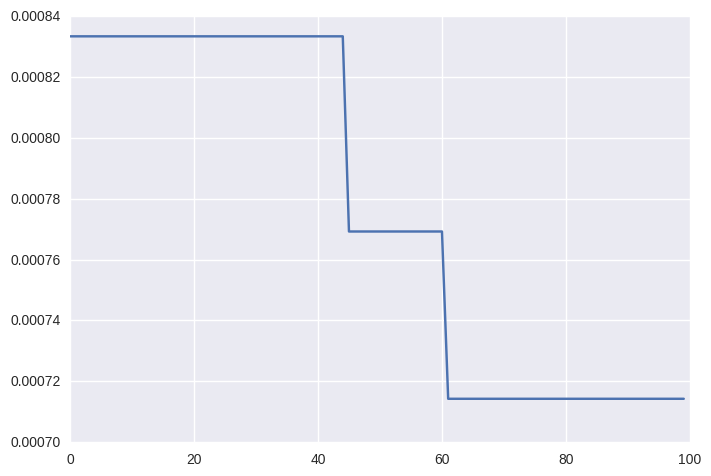

In [49]:
plt.plot(per.loss_history)

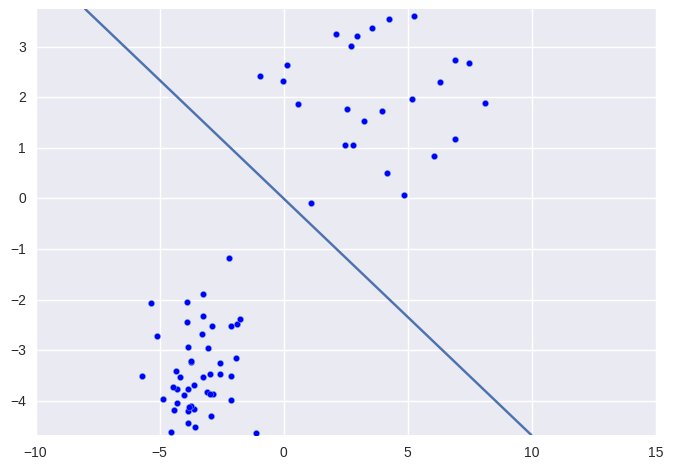

In [50]:
per.plot_boundary()